# IMPORTING REQUIRED PACKAGES

In [20]:
#importing pandas and reading file
import pandas as pd
file = "Arts_Crafts_and_sewing_5.csv"
df = pd.read_csv(file)
df.head(20)

overall  verified      reviewerID        asin  \
0         4      True   AIE8N9U317ZBM   449819906   
1         5      True  A3ECOW0TWLH9V6   449819906   
2         4      True  A278N8QX9TY2OS   449819906   
3         5      True  A123W8HIK76XCN   449819906   
4         5      True  A2A6MZ2QB4AE0L   449819906   
5         5      True  A2OIU84NPVKIWN   449819906   
6         5      True   AKIV5VMRUZK1K   449819906   
7         4      True  A2BQ7YGPNCQSO4   449819906   
8         5      True  A2JNO9OR8FGNR4   449819906   
9         5      True  A1IFF9F3XA9X1I   449819906   
10        5      True  A3OI7AYBZ2BF1N  048625531X   
11        5      True  A1EWCPZ3FKLGLL  048625531X   
12        5      True  A3GEAE5YCV87KR  048625531X   
13        5      True  A304F5HPIBLUX2  048625531X   
14        5      True  A2F29ZE6OSBCUZ  048625531X   
15        2      True   AC0J24YW9X2FO   486473082   
16        5      True  A1FDXY51VC0UH0   486473082   
17        4      True  A1NTCDCKM4Y92P   486473082   
18        5      True  A3ONWA3EG24NGH   486473082   
19        5      True   ATHCXVSBRNZNW   715329278   

                                           reviewText  \
0                 Contains some interesting stitches.   
1   I'm a fairly experienced knitter of the one-co...   
2   Great book but the index is terrible. Had to w...   
3   I purchased the Kindle edition which is incred...   
4   Very well laid out and very easy to read.\n\nT...   
5   Beginning her career as a freelance knitter, M...   
6   This is a terrific stitch handbook (and I have...   
7   The book needs to be coil bound. The content i...   
8   I really am enjoying this book! I like the siz...   
9   Just received this book and looked over it cov...   
10  Son and grandson and I do these together.  Nic...   
11  This book is the perfect size to carry in your...   
12  Great value for such a little book. I brought ...   
13                                     great for kids   
14  Fun and simple. Easy to carry around for a bor...   
15  Not easy to follow.  Not enough patterns and n...   
16  I knit a great deal and saw this book in it's ...   
17  If I had known that this book had two differen...   
18  When I first saw this book years ago, I loved ...   
19  This magazine has been on my wish for awhile a...   

                                              summary  
0                                          Four Stars  
1     My current favorite go-to guide for inspiration  
2   lots of great examples, good instructions, col...  
3               Another little gem by Melissa Leapman  
4                                  Very comprehensive  
5                Great Addition to Any Stitch Library  
6                                    Count on Melissa  
7                                           good book  
8                                          Excellent!  
9                        Great addition to my library  
10                               perfect for 7 yr old  
11  This book is the perfect size to carry in your...  
12                 Great value for such a little book  
13                                         Five Stars  
14                                         Five Stars  
15                                      Old and dated  
16                                          Wonderful  
17                         Different covers same book  
18                 Had been looking for this book....  
19                                  Beautiful designs

# DISPLAYING FIRST 400 CHARACTERS

In [25]:
#Displaying 400 characters of text from specific rows in the DataFrame using iloc
print(repr(df.iloc[2666]["reviewText"][0:400]))
print(repr(df.iloc[4726]["reviewText"][0:400]))

'Great for labeling my Muckboots.'
'This is a very nice seam ripper. The tip is small so it fits in tight spaces and very sharp so it cuts well.'


# SPLITTING TEXT

In [26]:
import re

# Fill NaN values with an empty string
df["reviewText"] = df["reviewText"].fillna("")

# Apply regular expression
df["paragraphs"] = df["reviewText"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# TF-IDF VECTORISATION OF TEXT DATA USING SCIKIT-LEARN

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['reviewText'])
tfidf_text_vectors.shape

(494485, 21086)

# FLATTEN PARAGRAPHS  

In [29]:
# flatten the paragraphs keeping the overall
paragraph_df = pd.DataFrame([{ "reviewText": paragraph, "overall": overall } 
                               for paragraphs, overall in zip(df["paragraphs"], df["overall"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

reviewText  overall
0                Contains some interesting stitches.        4
1  I'm a fairly experienced knitter of the one-co...        5
2  This gives you enough classic stitches to sati...        5
3  This also does not frustrate me in the ways to...        5
4  Here, Leapman uses the symbols common in knitt...        5
5  This is concise but full of options, so I FIND...        5
6  While I do love browsing Barbara Walker's stit...        5
7  Until that happens, this is my new go-to for f...        5
8  This is not a great resource for traditional k...        5
9  Great book but the index is terrible. Had to w...        4

# TF-IDF VECTORISATION OF PARAGRAPHS USING SCIKIT-LEARN 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["reviewText"])
tfidf_para_vectors.shape

(550733, 21235)

# TOPIC MODELING WITH NON-NEGATIVE MATRIX FACTORISATION (NMF) 

In [32]:
# Imports NMF from sklearn.decomposition, initializes an NMF model
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# DISPLAYING TOP WORDS IN EACH TOPIC

In [33]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  great (59.36)
  price (5.17)
  quality (2.19)
  item (1.44)
  value (1.37)

Topic 01
  love (58.86)
  colors (1.26)
  color (1.20)
  yarn (0.94)
  thank (0.69)

Topic 02
  good (55.80)
  quality (8.69)
  price (5.31)
  value (1.62)
  buy (0.94)

Topic 03
  nice (51.46)
  quality (2.87)
  colors (1.47)
  set (1.33)
  price (1.26)

Topic 04
  works (52.21)
  fine (1.87)
  perfectly (1.43)
  described (1.31)
  advertised (1.11)

Topic 05
  perfect (43.35)
  size (2.13)
  needed (1.93)
  thank (1.82)
  project (1.48)

Topic 06
  product (47.23)
  described (2.68)
  fast (2.26)
  happy (1.64)
  shipping (1.60)

Topic 07
  use (1.81)
  easy (1.23)
  like (1.11)
  work (0.96)
  colors (0.73)

Topic 08
  excellent (47.87)
  quality (10.84)
  thank (3.57)
  price (2.31)
  fast (1.16)

Topic 09
  expected (37.75)
  described (7.87)
  exactly (7.37)
  thank (4.73)
  arrived (2.50)


# TOPIC MODELING USING NON-NEGATIVE MATRIX

In [34]:
# Fit the NMF model to TF-IDF vectors of paragraph data
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  great (58.05)
  price (5.17)
  quality (2.15)
  item (1.40)
  value (1.37)

Topic 01
  love (57.82)
  colors (1.29)
  color (1.21)
  yarn (0.97)
  thank (0.62)

Topic 02
  good (54.22)
  quality (8.46)
  price (5.32)
  value (1.61)
  buy (0.95)

Topic 03
  nice (49.95)
  quality (2.82)
  colors (1.54)
  set (1.32)
  price (1.26)

Topic 04
  works (51.92)
  fine (1.91)
  perfectly (1.45)
  described (1.25)
  advertised (1.10)

Topic 05
  perfect (42.54)
  size (2.15)
  needed (1.90)
  thank (1.62)
  project (1.46)

Topic 06
  product (45.61)
  described (2.43)
  fast (2.11)
  happy (1.66)
  shipping (1.49)

Topic 07
  use (1.85)
  easy (1.25)
  like (1.13)
  work (0.97)
  colors (0.71)

Topic 08
  excellent (45.33)
  quality (11.61)
  thank (3.17)
  price (2.52)
  fast (1.10)

Topic 09
  expected (35.41)
  described (7.85)
  exactly (7.23)
  thank (6.32)
  arrived (2.46)


# CALCULATING PERCENTAGE ACROSS DOCUMENTS

In [35]:
# calculates the percentage distribution of topics across documents
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([12.97221196, 11.10727173, 11.11096078,  8.64720199,  4.89995327,
        6.22898409,  7.91706001, 25.61945161,  5.34544582,  6.15145875])

# CALCULATING TOPIC DISTRIBUTION PERCENTAGE ACROSS PARAGRAPHS

In [36]:
#calculates the percentage distribution of topics across paragraphs.
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([12.67178009, 10.85006289, 10.91257014,  8.49059116,  4.75877664,
        6.10258967,  7.99587873, 26.68737223,  5.28147497,  6.24890348])

# COUNT VECTORIZATION OF PARAGRAPHS USING SCIKIT-LEARN

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed

# Initialize CountVectorizer with English stop words
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform the CountVectorizer on the dataset
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["reviewText"])

# Initialize LatentDirichletAllocation with desired parameters
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Utilize multiple CPU cores

# Fit the LDA model to the CountVectorizer output
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Get the topic-word distributions
H_lda_para_matrix = lda_para_model.components_

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed
stop_words = stopwords.words('english')  # Get English stopwords
count_para_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["reviewText"])
count_para_vectors.shape

(550733, 21384)

# TOPIC MODELING FOR PARAGRAPHS USING LDA

In [39]:
#fits the LDA model to the count vectors of paragraph data
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

# DISPLAYING TOP WORDS FOR EACH TOPIC IN LDA MODEL

In [40]:
# Assuming count_para_vectorizer is properly initialized and fitted
feature_names = count_para_vectorizer.get_feature_names_out()

# Then use the feature names with the display_topics function
display_topics(lda_para_model, feature_names)


Topic 00
  great (16.91)
  perfect (4.23)
  product (3.78)
  works (3.52)
  love (2.68)

Topic 01
  one (1.47)
  would (1.29)
  get (0.90)
  amazon (0.89)
  product (0.84)

Topic 02
  use (2.95)
  fabric (2.14)
  easy (2.01)
  cut (1.93)
  cutting (1.39)

Topic 03
  color (4.75)
  colors (4.41)
  yarn (3.06)
  beautiful (1.94)
  love (1.75)

Topic 04
  paper (2.71)
  use (2.13)
  glue (1.21)
  used (1.01)
  make (0.96)

Topic 05
  machine (2.56)
  thread (2.35)
  sewing (1.89)
  use (1.23)
  one (1.19)

Topic 06
  pencils (2.91)
  recommend (2.79)
  highly (2.30)
  set (1.83)
  well (1.73)

Topic 07
  paint (1.77)
  use (1.43)
  brush (1.16)
  water (1.01)
  brushes (1.00)

Topic 08
  needles (1.96)
  size (1.61)
  like (1.40)
  use (1.14)
  small (1.10)

Topic 09
  good (9.40)
  nice (6.25)
  quality (6.09)
  love (3.76)
  price (2.74)


# CALCULATING TOPIC DISTRIBUTION

In [41]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([15.52750057,  9.92889247,  8.90884809,  8.83926003, 10.53399598,
        8.82928353,  5.68107258,  9.74276607,  9.087418  , 12.92096267])

# WORDCLOUDS

In [42]:

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

/var/folders/3y/jg1j3rjd3t96f2c93lqsc98m0000gn/T/ipykernel_15427/3632227722.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# WORDCLOUD FOR NMF MODEL

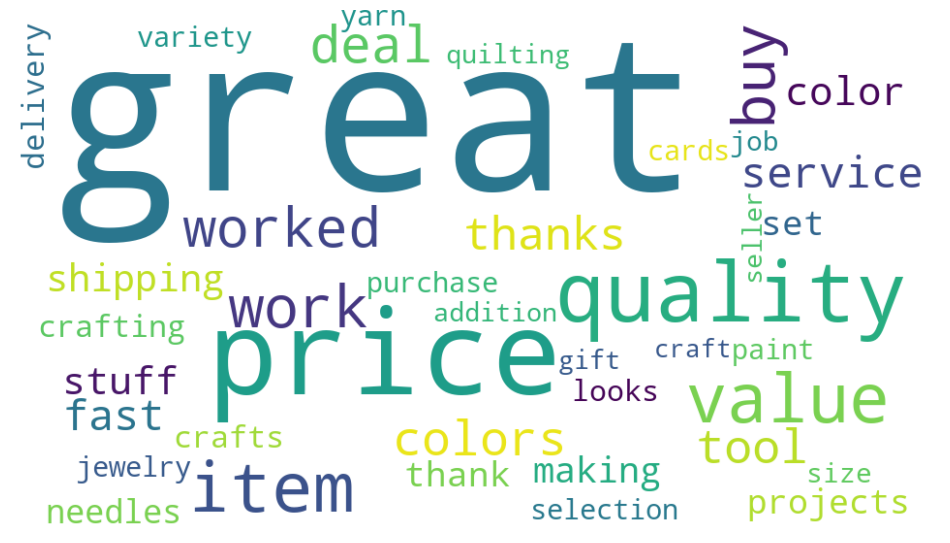

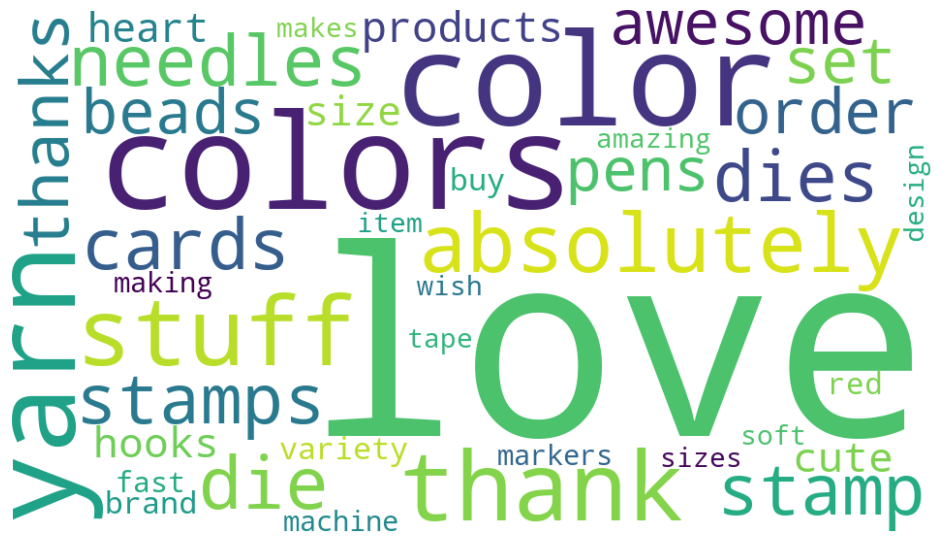

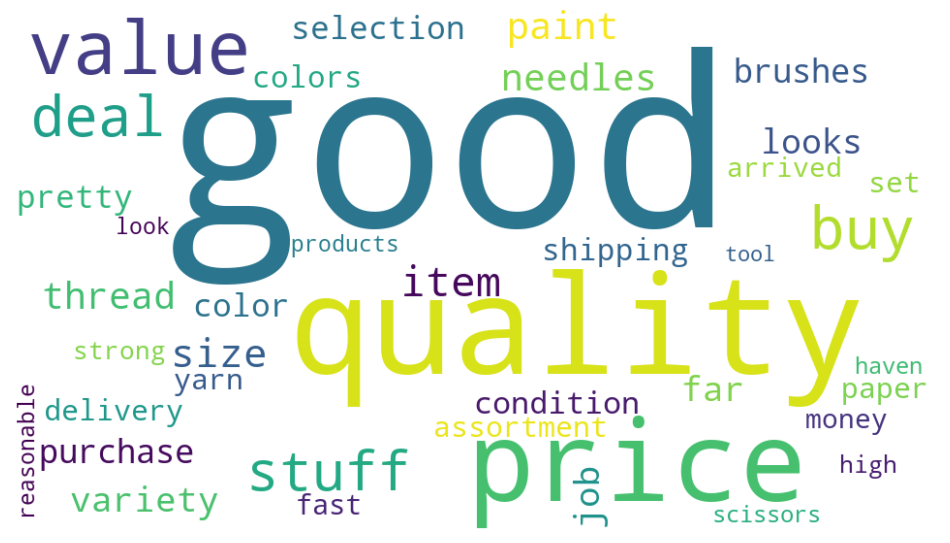

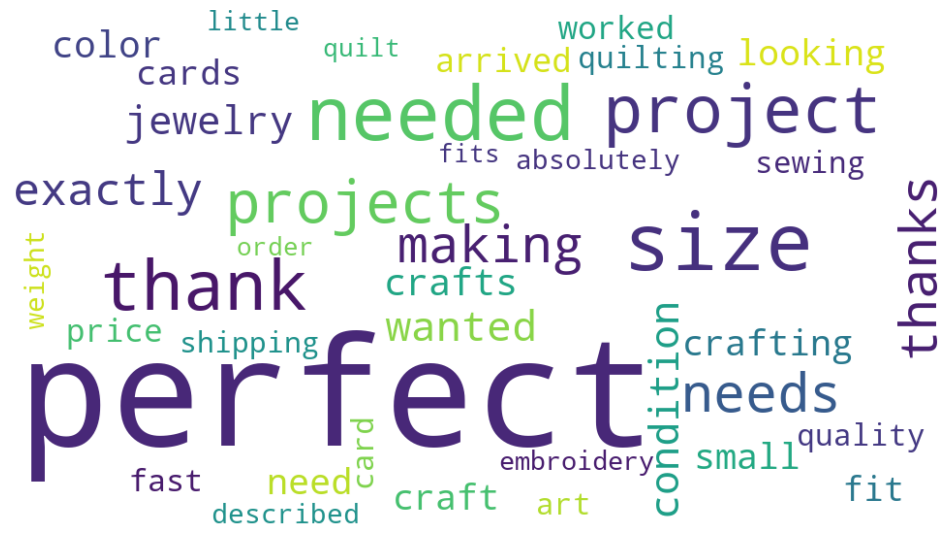

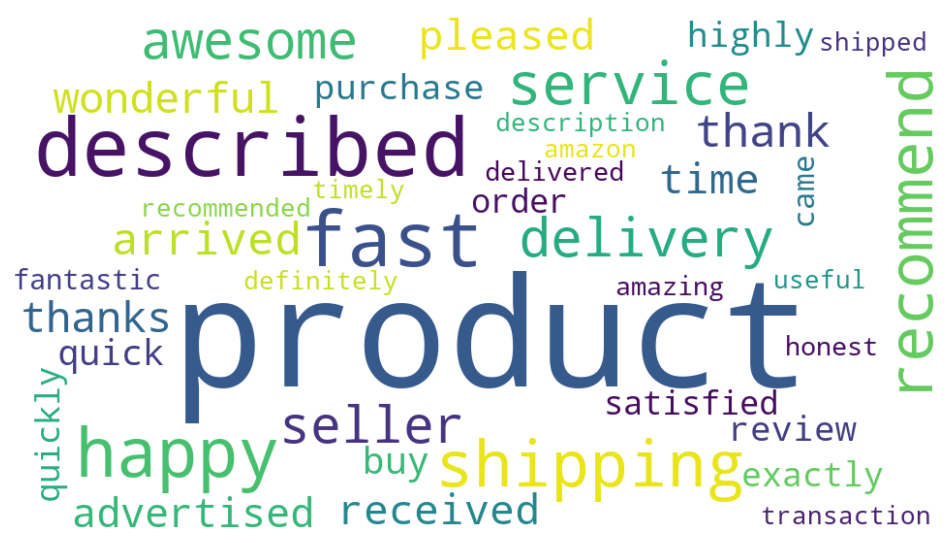

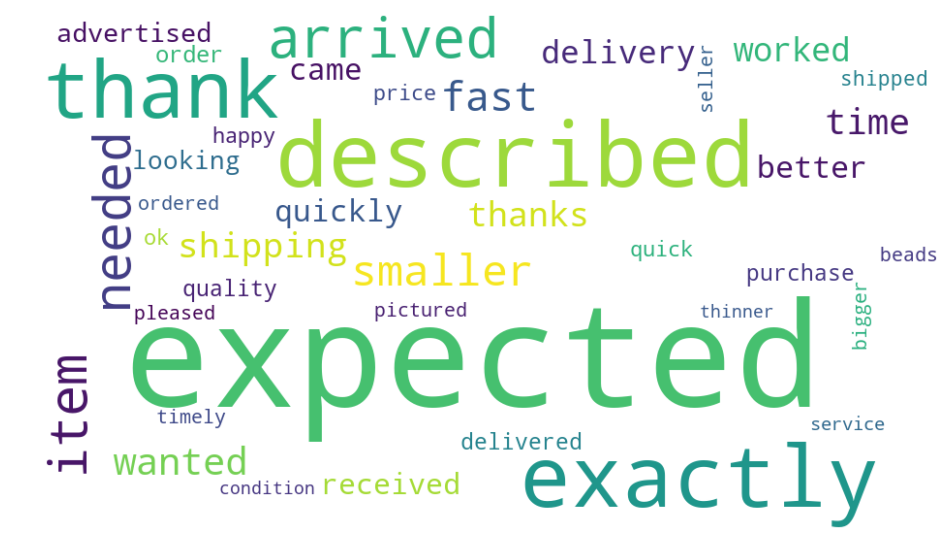

In [43]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

# WORDCLOUD FOR LDA MODEL

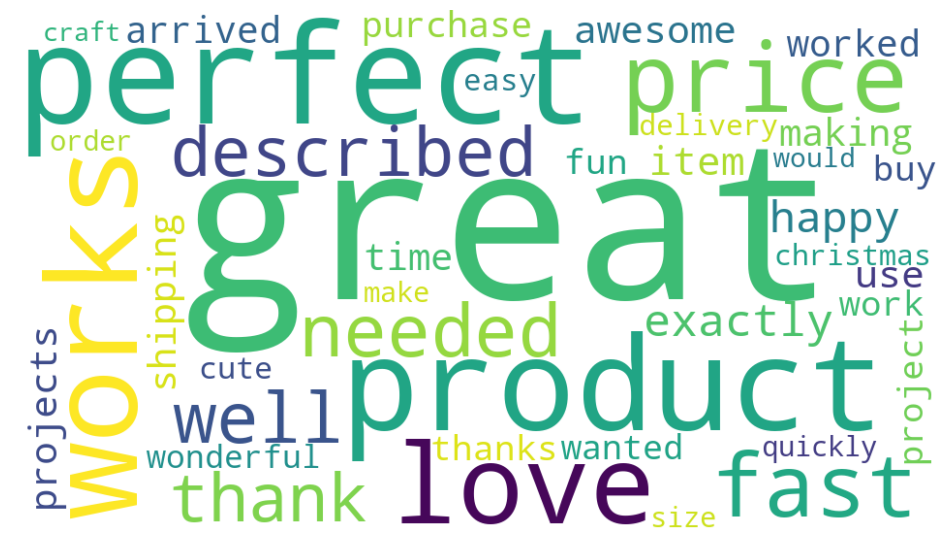

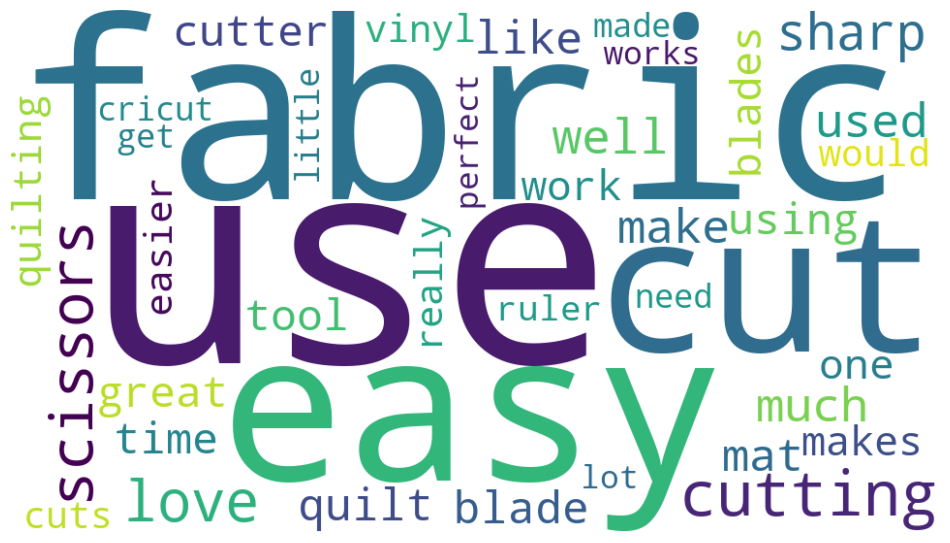

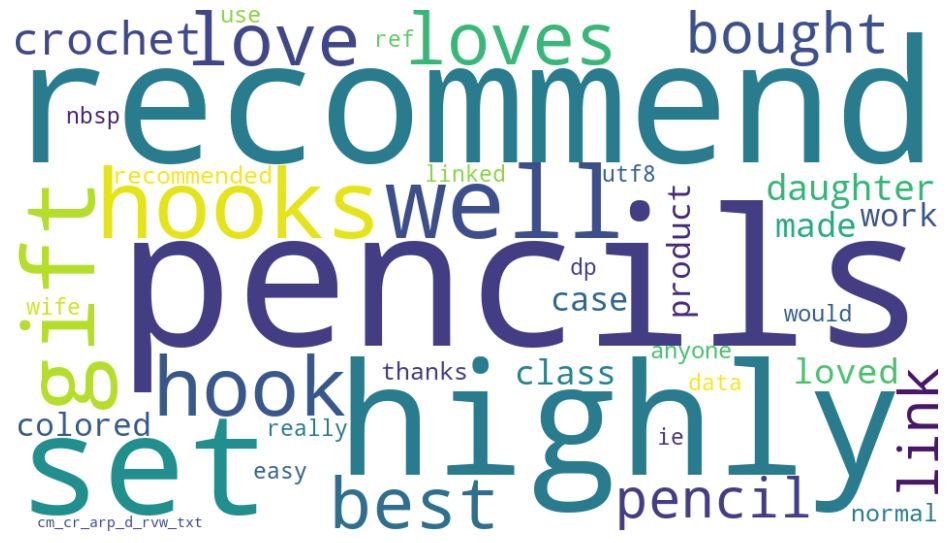

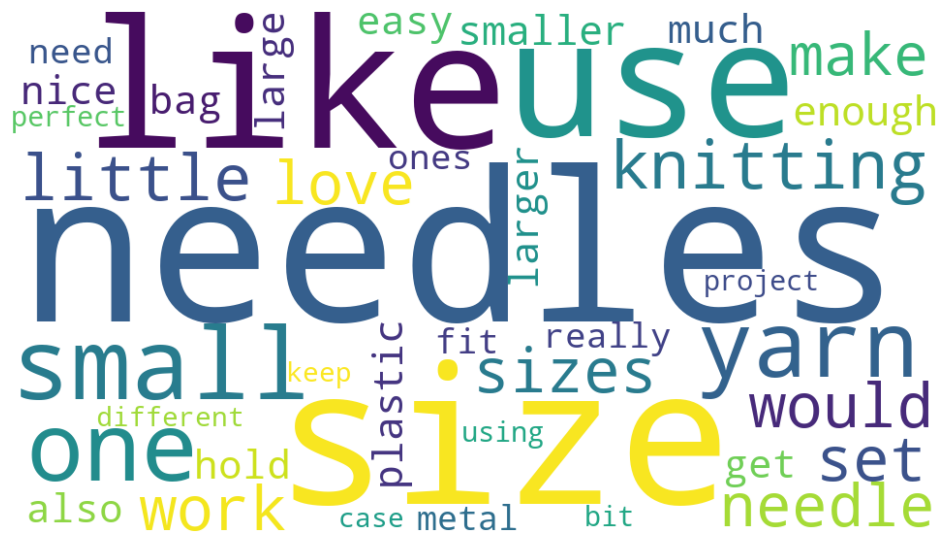

In [44]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

# TOPIC NAMES FOR NMF MODEL

In [45]:
#iterates over each topic in the model's components and identifies the most important words.

topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

# GENERATING TOPIC NAMES

In [46]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["overall"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["overall"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/5 [00:00<?, ?it/s]

# VISUALIZE TOPIC DISTRIBUTION OVER YEARS

<Axes: xlabel='label'>

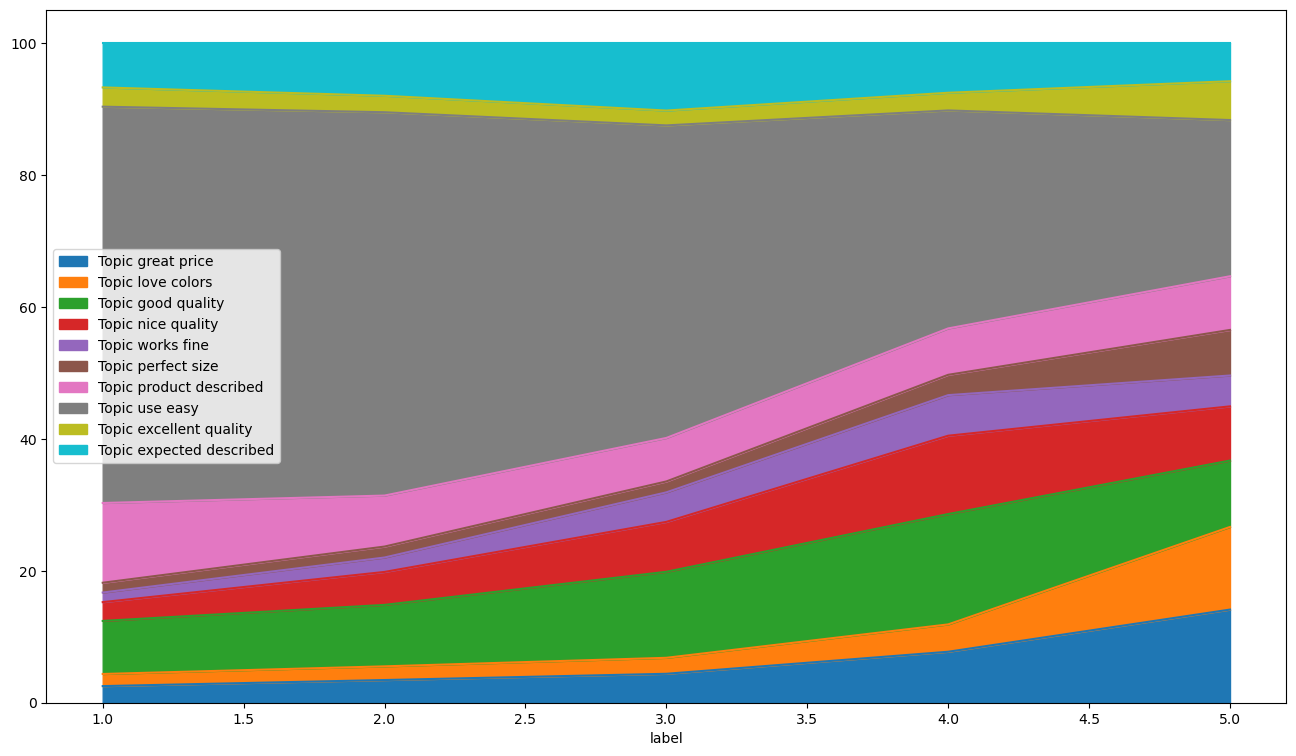

In [47]:
#imports matplotlib.pyplot as plt and uses it to visualize the distribution
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["label"] + topic_names).set_index("label")
df_year.plot.area(figsize=(16,9))